In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

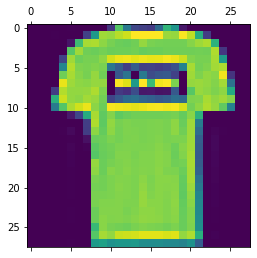

In [ ]:
plt.matshow(x_train[1])

In [ ]:
y_train[1]

0

In [ ]:
model = keras.models.Sequential()

inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") /255

In [ ]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = keras.optimizers.Adam(learning_rate=0.01), 
              metrics = [keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
model.fit(x_train,y_train, epochs = 5,batch_size=64)

Epoch 1/5
782/782 [==============================] - 2s 2ms/step - loss: 0.5288 - sparse_categorical_accuracy: 0.8091
Epoch 2/5
782/782 [==============================] - 2s 2ms/step - loss: 0.4284 - sparse_categorical_accuracy: 0.8426
Epoch 3/5
782/782 [==============================] - 2s 2ms/step - loss: 0.4033 - sparse_categorical_accuracy: 0.8539
Epoch 4/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3870 - sparse_categorical_accuracy: 0.8608
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3812 - sparse_categorical_accuracy: 0.8642


In [ ]:
x_test.shape

(10000, 784)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4523 - sparse_categorical_accuracy: 0.8315


[0.4522765576839447, 0.8314999938011169]

In [ ]:
yp = model.predict(x_test)

In [ ]:
yp.shape

(10000, 10)

In [ ]:
yp[0]

array([5.5373198e-06, 7.0109786e-06, 8.0394341e-07, 5.5339200e-08,
       9.7151387e-06, 3.0896447e-03, 2.8464796e-05, 7.8888116e-03,
       3.4610232e-05, 9.8893529e-01], dtype=float32)

In [ ]:
yp[1]

array([1.9915188e-04, 7.8203375e-06, 8.3589196e-01, 1.1229885e-05,
       1.2144875e-01, 3.1108754e-10, 4.2127196e-02, 5.5562217e-12,
       3.1367014e-04, 2.1114691e-07], dtype=float32)

In [ ]:
np.argmax(yp[1])

2